In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

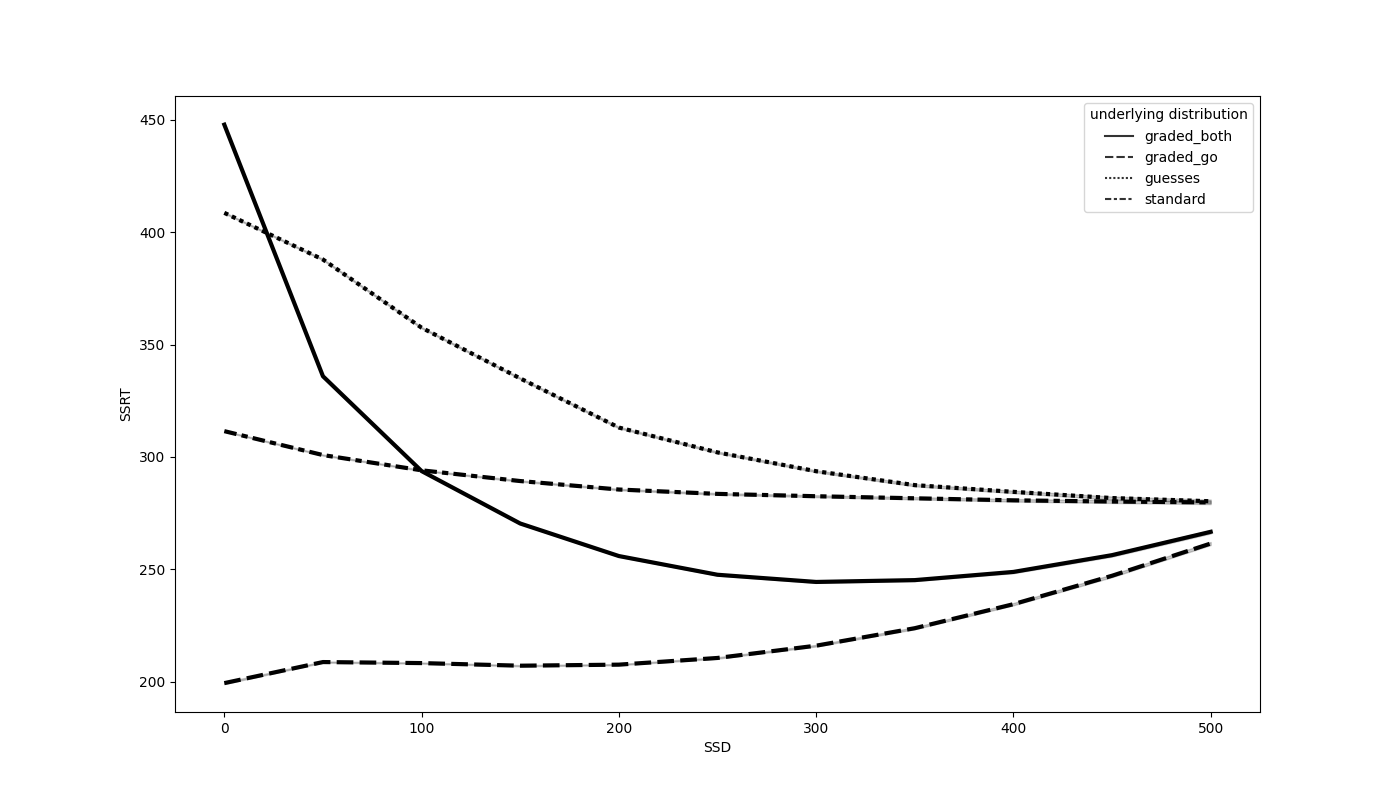

In [2]:
Image('figures/SSRT_by_SSD.png')

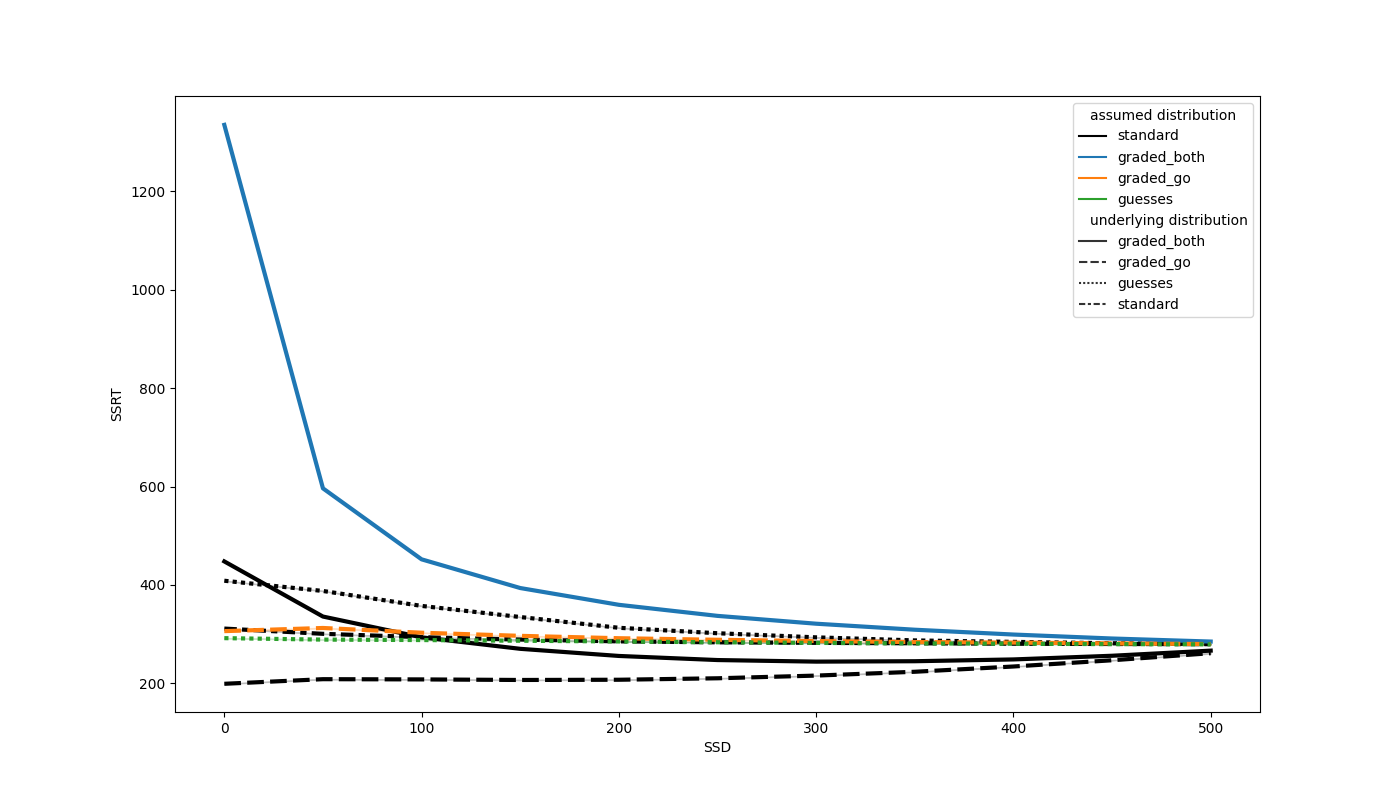

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

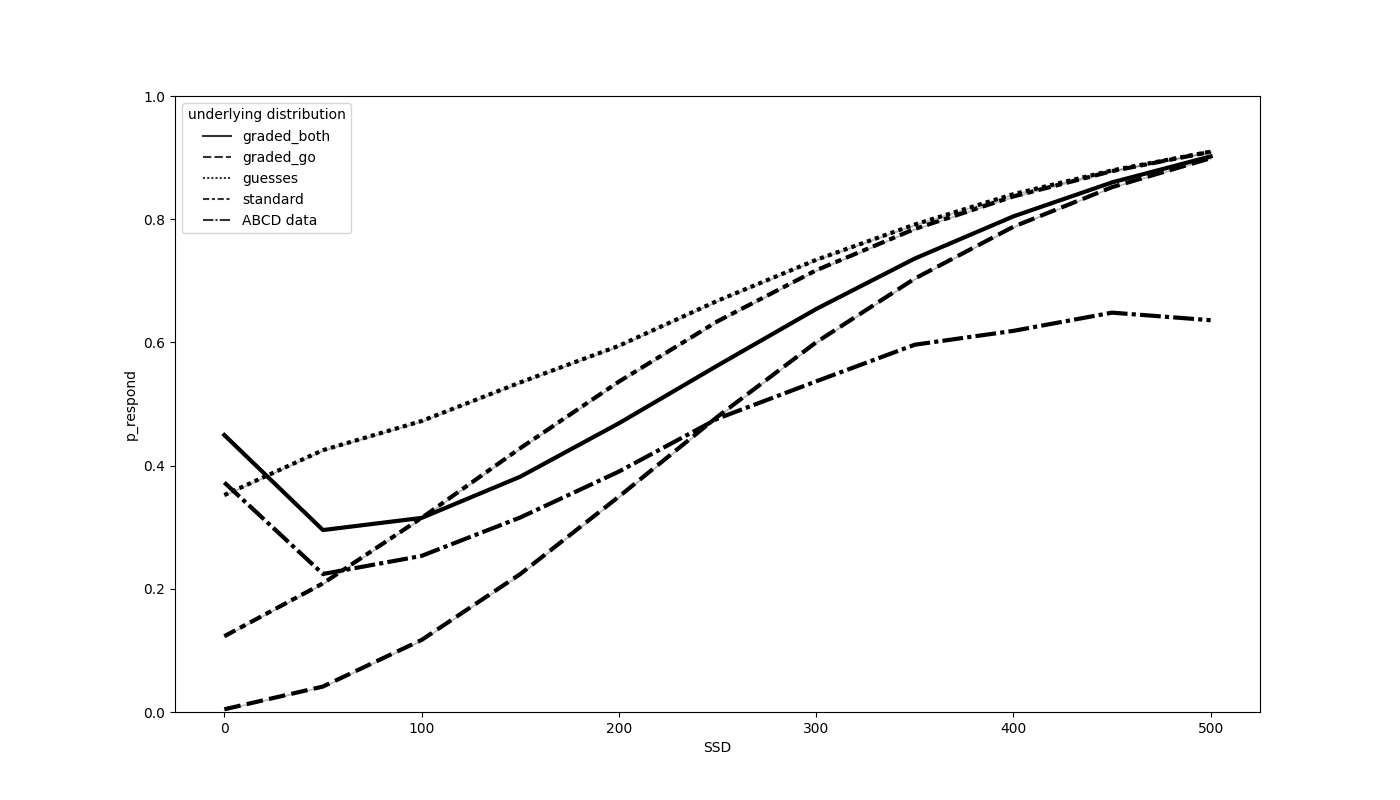

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,545.743782,0.201717,301.339962,0.397867
007W6H7B,545.743782,0.201717,301.339962,0.397867
00CY2MDM,545.743782,0.201717,301.339962,0.397867
00HEV6HB,545.743782,0.201717,301.339962,0.397867
00J52GPG,545.743782,0.201717,301.339962,0.397867


In [10]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), sim_rt_info, df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [11]:
monster_df

,assigned_goRT,assigned_go,assigned_SSRT,assigned_stop,sim_rt_mean,sim_rt_std,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,...,gen-guesses_SSRT-graded_go,gen-standard_SSRT-graded_go,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both,gen-guesses_SSRT-graded_both,gen-standard_SSRT-graded_both,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
00J52GPG,545.743782,0.201717,301.339962,0.397867,537.5210,216.061634,311.981132,217.905660,335.320755,295.584906,...,595.245283,455.113208,563.641509,293.433962,595.245283,455.113208,289.0,221.0,332.0,292.0
00LJVZK2,545.743782,0.201717,301.339962,0.397867,512.0010,196.643602,303.754717,212.320755,329.773585,288.283019,...,590.056604,455.113208,556.867925,289.924528,590.056604,455.113208,280.0,218.0,330.0,288.0
00R4TXET,545.743782,0.201717,301.339962,0.397867,529.3815,207.965889,299.943396,217.094340,340.452830,296.150943,...,593.584906,461.698113,552.471698,297.867925,593.584906,461.698113,277.0,217.0,335.0,291.0
028WCTG6,545.743782,0.201717,301.339962,0.397867,544.3005,218.878764,312.773585,212.547170,341.660377,290.188679,...,596.603774,453.886792,565.773585,291.792453,596.603774,453.886792,285.0,213.0,344.0,289.0
029PWCFY,545.743782,0.201717,301.339962,0.397867,516.4205,196.747987,307.320755,215.849057,333.000000,290.679245,...,597.075472,452.716981,566.264151,296.716981,597.075472,452.716981,279.0,217.0,330.0,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUXHPX3N,545.743782,0.201717,301.339962,0.397867,481.6645,182.295748,307.830189,217.056604,334.037736,293.622642,...,598.037736,458.641509,577.113208,304.320755,598.037736,458.641509,279.0,215.0,334.0,289.0
ZWWDT1TG,545.743782,0.201717,301.339962,0.397867,620.1270,271.202340,309.113208,212.867925,336.377358,292.754717,...,593.962264,455.660377,566.471698,291.547170,593.962264,455.660377,281.0,214.0,339.0,289.0
ZXF5C635,545.743782,0.201717,301.339962,0.397867,466.2770,167.058153,309.830189,217.018868,339.018868,290.226415,...,590.981132,449.867925,562.547170,295.490566,590.981132,449.867925,284.0,215.0,338.0,289.0
ZXPAWB32,545.743782,0.201717,301.339962,0.397867,460.1125,169.012844,304.452830,219.415094,342.396226,294.490566,...,596.886792,449.849057,571.037736,298.886792,596.886792,449.849057,277.0,218.0,340.0,291.0


In [12]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

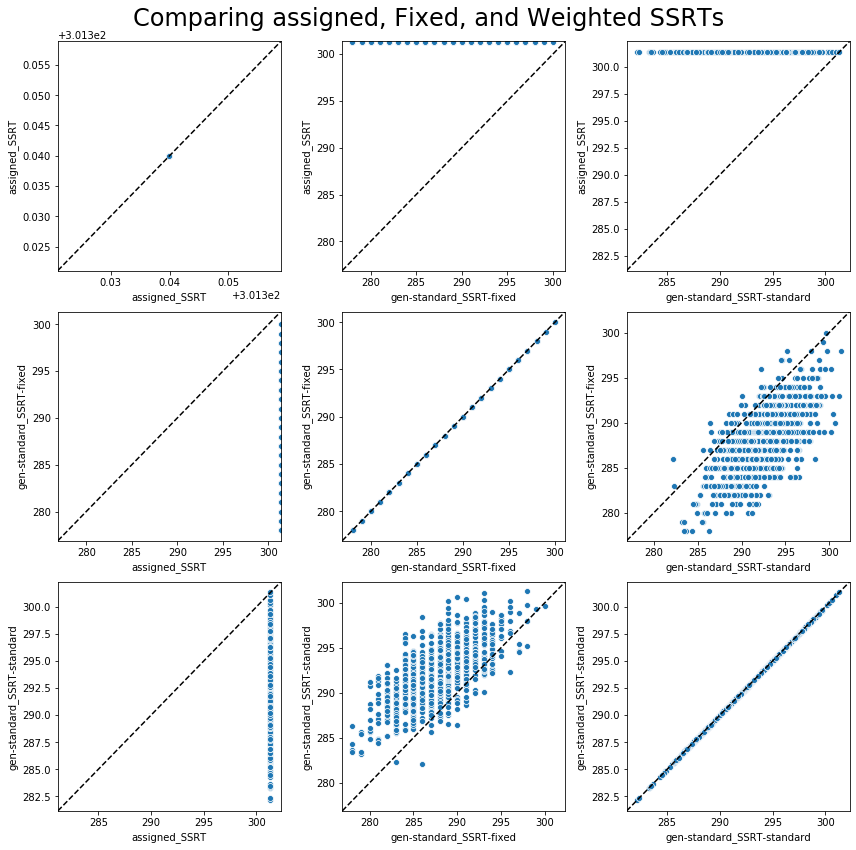

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [14]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard
assigned_SSRT,NaN,NaN,NaN
gen-standard_SSRT-fixed,NaN,1.000000,0.637658
gen-standard_SSRT-standard,NaN,0.637658,1.000000


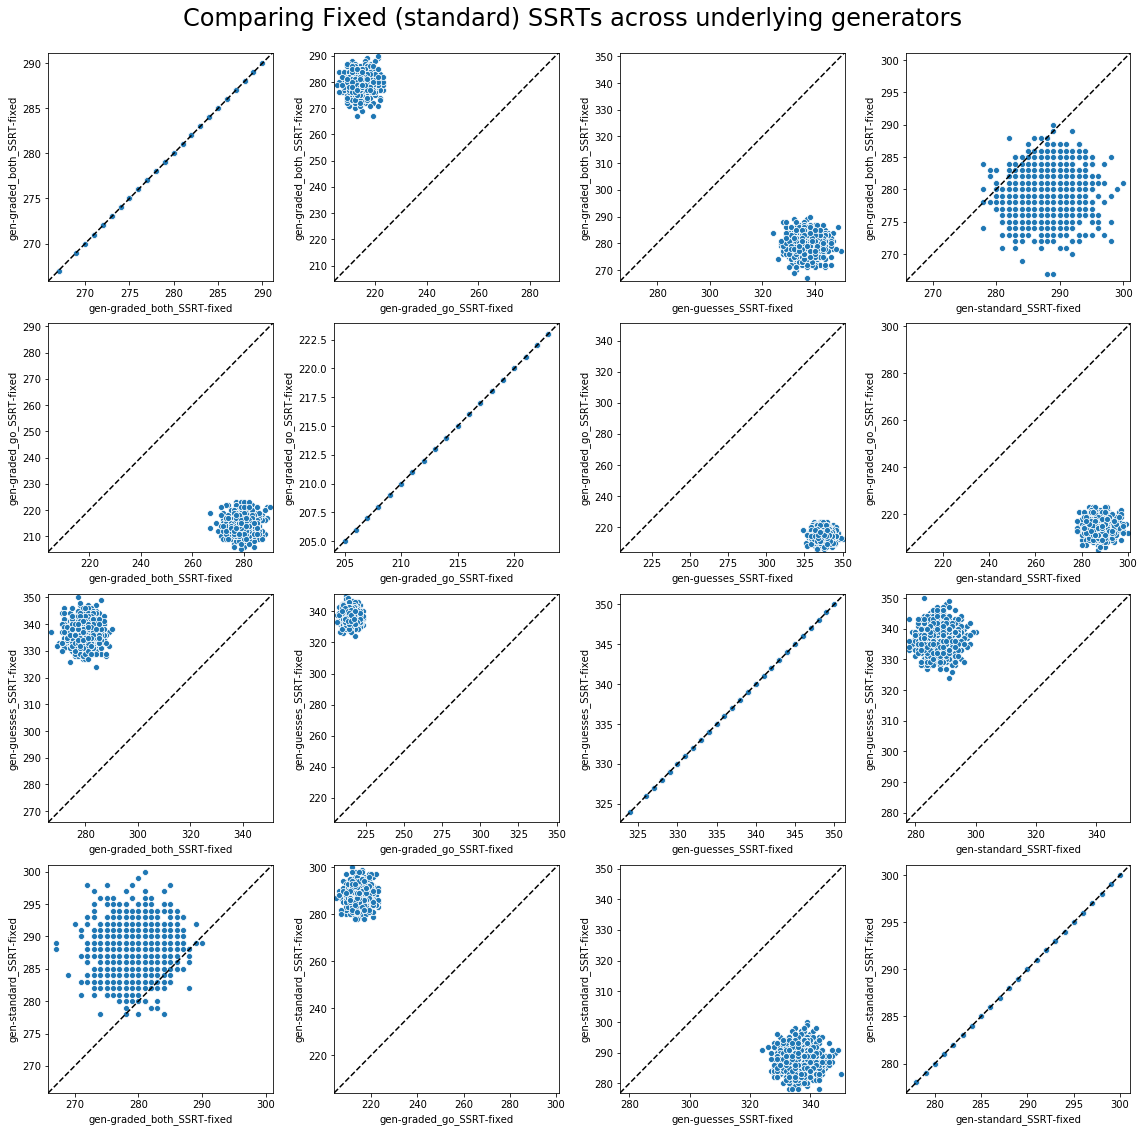

In [15]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [16]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,0.035443,0.034047,0.046744
gen-graded_go_SSRT-fixed,0.035443,1.000000,0.018225,0.009338
gen-guesses_SSRT-fixed,0.034047,0.018225,1.000000,-0.023050
gen-standard_SSRT-fixed,0.046744,0.009338,-0.023050,1.000000


## (not rescaling the axes to get a closer look)

In [17]:
for col in curr_df.columns:
    fixed_ssrts = monster_df[col].unique()
    fixed_ssrts.sort()
    print(col,  len(fixed_ssrts), fixed_ssrts)

gen-graded_both_SSRT-fixed 23 [267. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279. 280. 281.
 282. 283. 284. 285. 286. 287. 288. 289. 290.]
gen-graded_go_SSRT-fixed 19 [205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218.
 219. 220. 221. 222. 223.]
gen-guesses_SSRT-fixed 26 [324. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335. 336. 337. 338.
 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349. 350.]
gen-standard_SSRT-fixed 23 [278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300.]


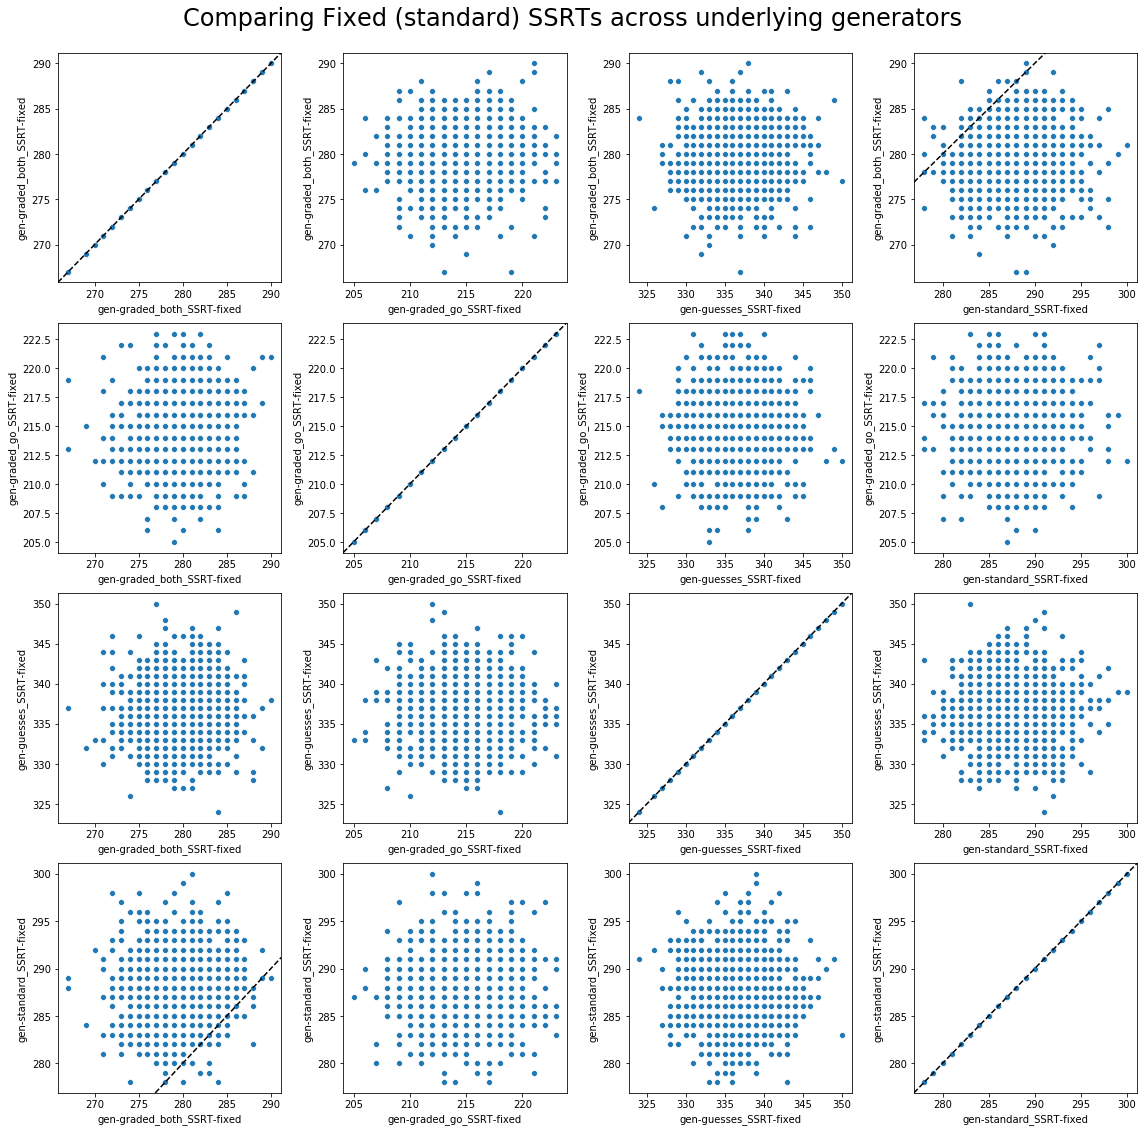

In [18]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

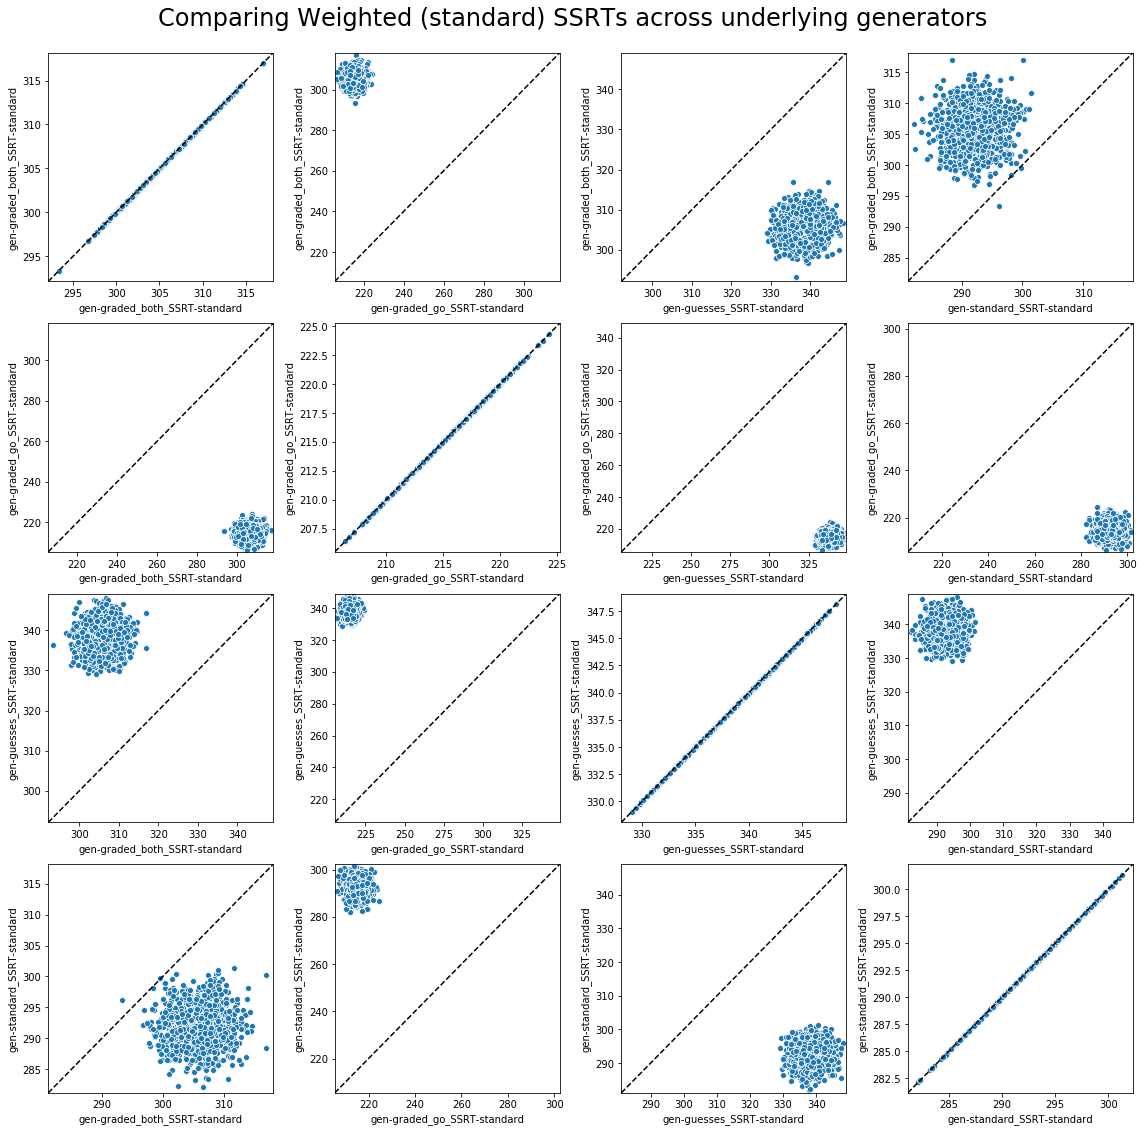

In [32]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [33]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,0.041165,0.029699,-0.002752
gen-graded_go_SSRT-standard,0.041165,1.000000,0.015724,0.026697
gen-guesses_SSRT-standard,0.029699,0.015724,1.000000,0.025542
gen-standard_SSRT-standard,-0.002752,0.026697,0.025542,1.000000


## not rescaling axis to get a closer look

In [39]:
for col in curr_df.columns:
    fixed_ssrts = monster_df[col].unique()
    fixed_ssrts.sort()
    print(col,  len(fixed_ssrts), np.max(fixed_ssrts) - np.min(fixed_ssrts))

gen-graded_both_SSRT-standard 805 23.622641509433947
gen-graded_go_SSRT-standard 844 17.96226415094344
gen-guesses_SSRT-standard 872 19.0943396226416
gen-standard_SSRT-standard 766 19.207547169811278


19.207547169811278

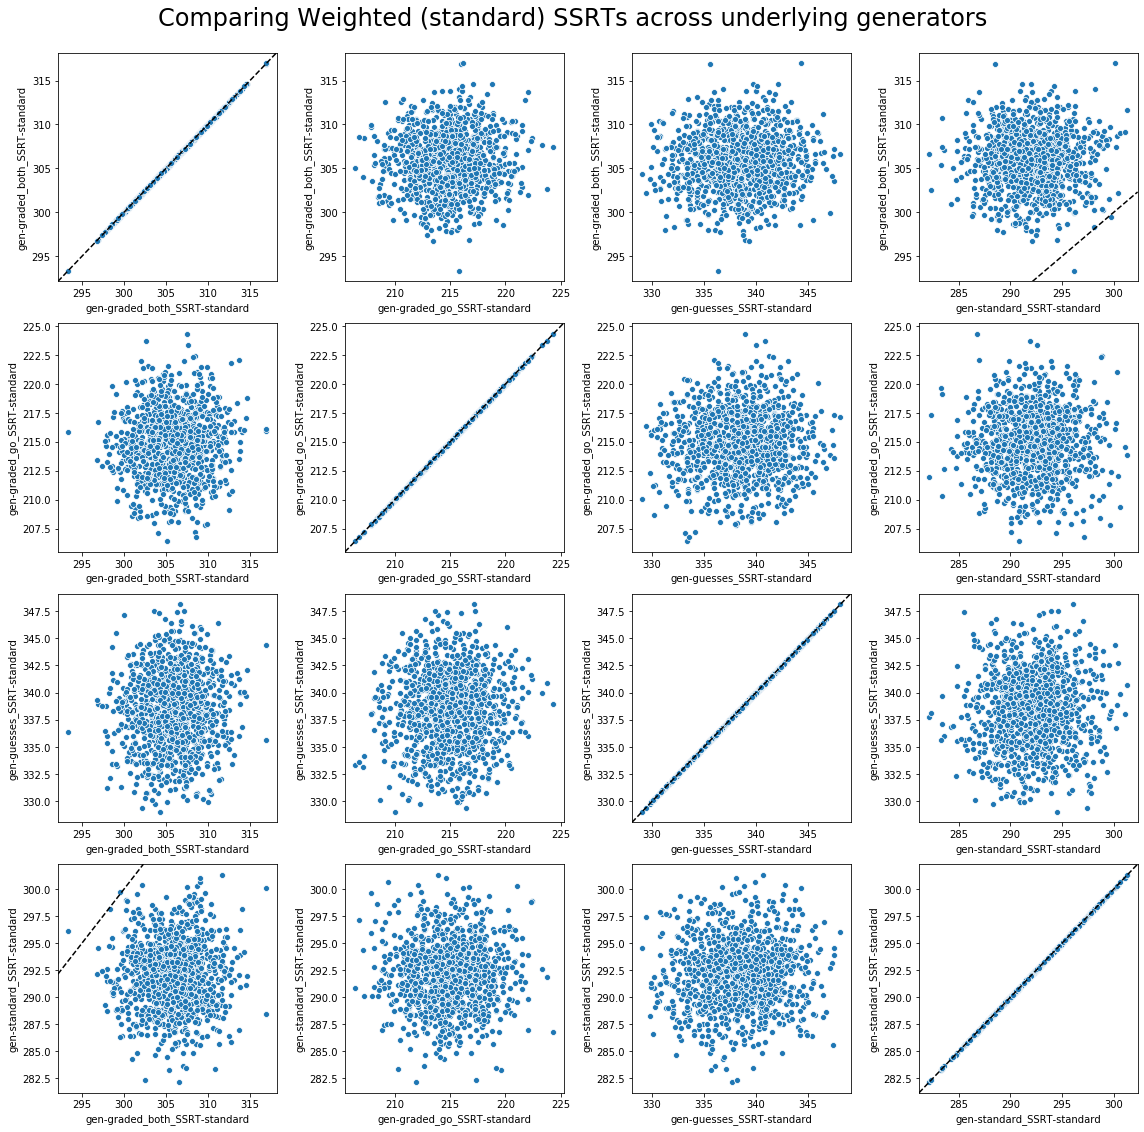

In [31]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [21]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
count,1.152000e+03,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,3.013400e+02,305.874312,214.831008,338.395719,292.163719,279.466146,214.659722,336.715278,287.733507
std,4.720053e-12,3.249579,2.796484,3.429205,3.034615,3.258442,2.969086,3.726605,3.413469
min,3.013400e+02,293.339623,206.396226,329.037736,282.132075,267.000000,205.000000,324.000000,278.000000
25%,3.013400e+02,303.693396,212.943396,336.018868,290.113208,277.000000,213.000000,334.000000,285.000000
50%,3.013400e+02,305.943396,214.783019,338.528302,292.226415,280.000000,215.000000,337.000000,288.000000
75%,3.013400e+02,308.099057,216.683962,340.702830,294.075472,282.000000,217.000000,339.000000,290.000000
max,3.013400e+02,316.962264,224.358491,348.132075,301.339623,290.000000,223.000000,350.000000,300.000000


In [22]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,gen-guesses_SSRT-graded_go.2,gen-standard_SSRT-graded_go.3,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both.1,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3
gen-graded_both_SSRT-standard,1.000000,0.041165,0.029699,-0.002752,0.900045,0.029322,0.025578,-0.013429,0.298096,0.029785,-0.002055,-0.008548,0.298096,0.029785,-0.002055,-0.008548,0.713471,0.004772,0.028911,0.033177
gen-graded_go_SSRT-standard.1,0.041165,1.000000,0.015724,0.026697,0.050424,0.801501,0.008867,0.012668,0.006474,0.425354,0.014708,-0.015620,0.006474,0.425354,0.014708,-0.015620,0.039270,0.510082,0.008263,0.002497
gen-guesses_SSRT-standard.2,0.029699,0.015724,1.000000,0.025542,0.046478,0.042457,0.920865,0.032800,-0.003355,0.032704,0.266323,0.000877,-0.003355,0.032704,0.266323,0.000877,0.013811,0.020069,0.739158,-0.003197
gen-standard_SSRT-standard.3,-0.002752,0.026697,0.025542,1.000000,-0.006195,0.014201,0.049241,0.905347,0.012937,0.002302,0.052389,0.306905,0.012937,0.002302,0.052389,0.306905,0.004842,0.015376,-0.015463,0.637658
gen-graded_both_SSRT-guesses,0.900045,0.050424,0.046478,-0.006195,1.000000,0.023771,0.052836,-0.015713,0.383538,0.025162,0.012825,-0.014212,0.383538,0.025162,0.012825,-0.014212,0.567708,0.005973,0.029350,0.013427
gen-graded_go_SSRT-guesses.1,0.029322,0.801501,0.042457,0.014201,0.023771,1.000000,0.038705,-0.005324,0.019091,0.554676,0.050307,-0.021113,0.019091,0.554676,0.050307,-0.021113,0.037534,0.360468,0.005420,-0.008210
gen-guesses_SSRT-guesses.2,0.025578,0.008867,0.920865,0.049241,0.052836,0.038705,1.000000,0.058279,0.005416,0.035227,0.375779,0.019840,0.005416,0.035227,0.375779,0.019840,0.015449,0.012072,0.617476,0.000370
gen-standard_SSRT-guesses.3,-0.013429,0.012668,0.032800,0.905347,-0.015713,-0.005324,0.058279,1.000000,0.008364,-0.009772,0.042753,0.418782,0.008364,-0.009772,0.042753,0.418782,-0.007695,0.014581,-0.011538,0.496587
gen-graded_both_SSRT-graded_go,0.298096,0.006474,-0.003355,0.012937,0.383538,0.019091,0.005416,0.008364,1.000000,0.109970,0.340155,0.194516,1.000000,0.109970,0.340155,0.194516,0.129117,-0.019419,-0.011421,0.029584
gen-graded_go_SSRT-graded_go.1,0.029785,0.425354,0.032704,0.002302,0.025162,0.554676,0.035227,-0.009772,0.109970,1.000000,0.112983,0.102599,0.109970,1.000000,0.112983,0.102599,0.059877,0.118716,0.030061,0.008909


In [23]:
monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()].to_csv('simulation_mainSSRTs_scale0.csv')
len(monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()])

1152

# testing a subject to investigate fixed SSD - not finished yet

In [24]:
def generate_out_df_simple(data):
    info = []
    ssrtmodel = SSRTmodel(model='replacement')
    goRTs = data.loc[data.goRT.notnull(), 'goRT'].values
    SSDs = [i for i in data.SSD.unique() if i == i]
    SSDs.sort()

    for SSD in SSDs:
        curr_df = data.query(
            "condition=='go' | (condition=='stop' and SSD == %s)" % SSD
            )
        curr_metrics = ssrtmodel.fit_transform(curr_df)
        curr_info = [v for v in curr_metrics.values()] +\
                    [SSD]
        info.append(curr_info)
        
    cols = [k for k in curr_metrics.keys()] +\
           ['SSD']
    # get for metrics using whole simulated data
    curr_metrics = SSRTmodel(model='replacement').fit_transform(data)
    curr_info = [v for v in curr_metrics.values()] +\
                [-np.inf]
    info.append(curr_info)

    return pd.DataFrame(
        info,
        columns=cols)

In [25]:
simulator_dict = {
    'standard': SimulateData(),
}

ssrtmodel = SSRTmodel(model='replacement')

# set up shared params
SSDs = np.arange(0, 550, 50)
params = {
    'n_trials_stop': 3000,
    'n_trials_go': 10000,
    'SSDs': SSDs,
}

# SIMULATE INDIVIDUALS
issue_subs = []
for sub in monster_df.loc[monster_df['gen-graded_both_SSRT-standard'].notnull(), :].index[9:10]:
    params['mu_go'] = mus_dict[sub]['go']
    params['mu_stop'] = mus_dict[sub]['stop']

    for sim_key in simulator_dict:
        print('mu_stop', params['mu_stop'])
        data = simulator_dict[sim_key].simulate(params)
        print('assigned', monster_df.loc[sub, 'assigned_SSRT'])
        print('mu_stop', params['mu_stop'])
        print('calculated', ssrtmodel.fit_transform(data)['SSRT'])
        print('*'*40)
        
        
        

mu_stop 0.3978674912193927
assigned 301.33996168804316
mu_stop 0.3978674912193927
calculated 251.0
****************************************


In [26]:
ssrt_by_ssd_df = generate_out_df_simple(data)
ssrt_by_ssd_df

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,sd_go_RT,mean_stopfail_RT,sd_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD
0,311.0,0.0,0.119667,1857.0,506.0753,194.309999,312.679666,67.358421,0,0.0,NaN,NaN,0.0
1,302.0,50.0,0.215333,1857.0,506.0753,194.309999,316.486068,68.807262,0,0.0,NaN,NaN,50.0
2,288.0,100.0,0.306000,1857.0,506.0753,194.309999,339.187364,72.662601,0,0.0,NaN,NaN,100.0
3,290.0,150.0,0.432333,1857.0,506.0753,194.309999,362.800308,79.684666,0,0.0,NaN,NaN,150.0
4,280.0,200.0,0.529667,1857.0,506.0753,194.309999,382.716803,86.759361,0,0.0,NaN,NaN,200.0
5,282.0,250.0,0.636333,1857.0,506.0753,194.309999,398.862232,97.716284,0,0.0,NaN,NaN,250.0
6,276.0,300.0,0.710667,1857.0,506.0753,194.309999,416.066135,105.398361,0,0.0,NaN,NaN,300.0
7,283.0,350.0,0.787667,1857.0,506.0753,194.309999,434.344054,111.010941,0,0.0,NaN,NaN,350.0
8,290.0,400.0,0.847333,1857.0,506.0753,194.309999,444.674272,120.906315,0,0.0,NaN,NaN,400.0
9,262.0,450.0,0.866667,1857.0,506.0753,194.309999,454.208846,130.031102,0,0.0,NaN,NaN,450.0


In [27]:
generate_out_df_simple(data.loc[data.SSD.isin(np.arange(50, 300, 50)) | (data.condition=='go')])

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,sd_go_RT,mean_stopfail_RT,sd_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD
0,302.0,50.0,0.215333,1857.0,506.0753,194.309999,316.486068,68.807262,0,0.0,NaN,NaN,50.0
1,288.0,100.0,0.306000,1857.0,506.0753,194.309999,339.187364,72.662601,0,0.0,NaN,NaN,100.0
2,290.0,150.0,0.432333,1857.0,506.0753,194.309999,362.800308,79.684666,0,0.0,NaN,NaN,150.0
3,280.0,200.0,0.529667,1857.0,506.0753,194.309999,382.716803,86.759361,0,0.0,NaN,NaN,200.0
4,282.0,250.0,0.636333,1857.0,506.0753,194.309999,398.862232,97.716284,0,0.0,NaN,NaN,250.0
5,286.0,150.0,0.423933,1857.0,506.0753,194.309999,370.489228,89.501265,0,0.0,NaN,NaN,-inf


# Plot graded Mu Go function

In [28]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:285: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


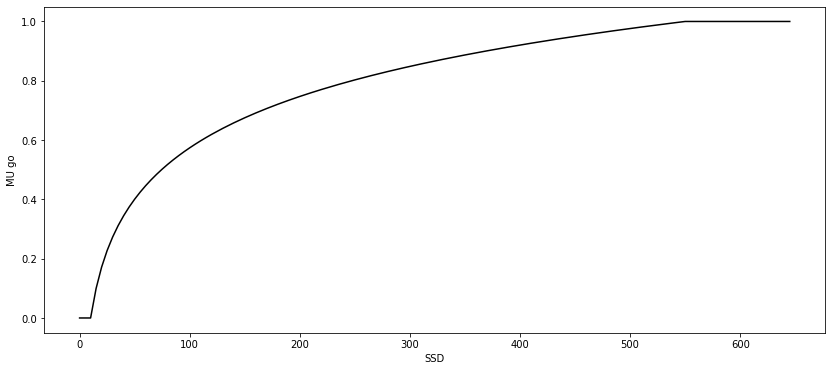

In [29]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')

In [30]:
monster_df.index.unique()

Index(['00J52GPG', '00LJVZK2', '00R4TXET', '028WCTG6', '029PWCFY', '030W95VP',
       '03VJZEL', '040B4TRC', '04BFG4JM', '052HU3CU',
       ...
       'ZRR4D9LW', 'ZTN5R70A', 'ZTP2ZHLN', 'ZTTGYL51', 'ZUDPGDWJ', 'ZUXHPX3N',
       'ZWWDT1TG', 'ZXF5C635', 'ZXPAWB32', 'ZYF317MG'],
      dtype='object', length=1152)